In [577]:
import pandas as pd
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt

def stock_sim_process(mu, steps, T, sims, initial_price, sigma):
    #Instantiate an array with columns equal to the number of steps and rows equal to the number of simulations.
    stock_sim_array = np.zeros((sims, steps))
    dt = T/steps
    for sim in range(sims):
        for step in range(steps):
            if step == 0:
                current_price = initial_price
                stock_sim_array[sim, step] = current_price
            else:
                previous_price = stock_sim_array[sim, step - 1]
                current_price = previous_price*np.exp((mu-sigma**2/2)*dt + sigma*np.sqrt(dt)*np.random.normal(0, 1))
                stock_sim_array[sim, step] = current_price
    return stock_sim_array

def plot_stock_sim_array(stock_sim_array, mu, steps, T, sigma):
    time_space = np.linspace(0, T, steps)
    initial_price = stock_sim_array[0, 0]
    for row in stock_sim_array:
        plt.plot(time_space, row)
    plt.xlabel("Trading Days $(t)$")
    plt.ylabel("Stock Price $(S_t)$")
    plt.title(
        "GBM Realizations\n $dS_t = \mu S_t dt + \sigma S_t dW_t$\n $S_0 = {0}, \mu = {1}, \sigma = {2}$".format(initial_price, mu, sigma)
    )
    plt.show()

In [578]:
total_time = 252 # time in days
drift_coef = 0.001/total_time # drift coefficent
num_timesteps = total_time*13 # number of steps; 6.5 hours in a trading day; 30 minute resolution means 13 half-hours in a trading day
num_sims = 1
price = 100  # initial stock price
volatility = 0.002 # volatility

[[100.          99.9812297  100.0126434  ... 100.82065802 100.7808963
  100.79026383]]


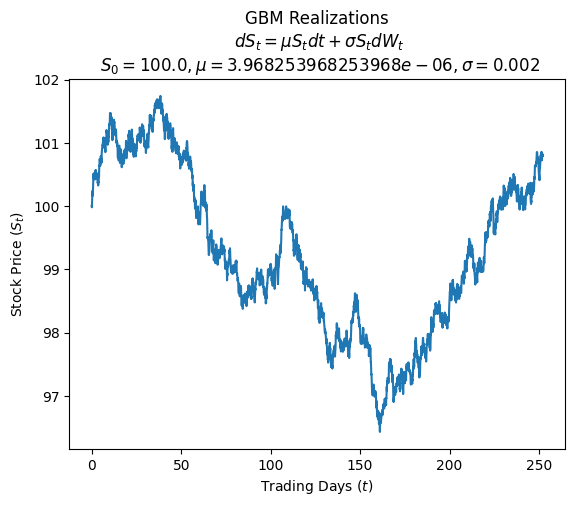

In [579]:
test_1 = stock_sim_process(mu=drift_coef, steps=num_timesteps, T=total_time, sims=num_sims, initial_price=price, sigma=volatility)
print(test_1)
plot_stock_sim_array(stock_sim_array=test_1, mu=drift_coef, steps=num_timesteps, T=total_time, sigma=volatility)

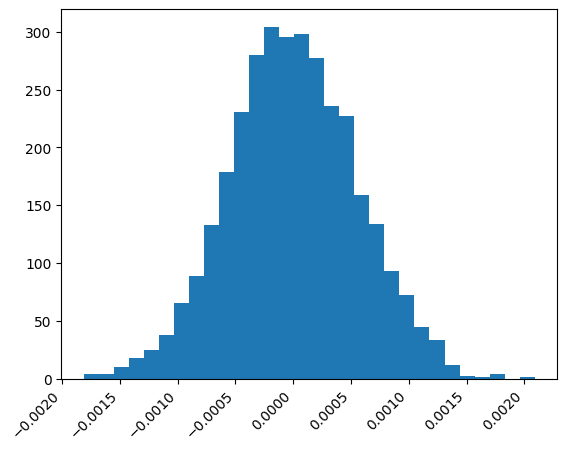

In [580]:
#Distribution for GBM
test_array = test_1[0]

def get_stock_return_ratios(array):
    return_ratios = []
    for index, price in enumerate(array):
        if index == 0:
            pass
        else:
            ratio = np.divide((test_array[index] - test_array[index-1]), test_array[index-1])
            return_ratios.append(ratio)
    return return_ratios
stock_return_ratios = get_stock_return_ratios(test_array)

plt.hist(stock_return_ratios, bins = 30)
plt.xticks(rotation=45, ha='right')
plt.show()

AndersonResult(statistic=0.4864400521037169, critical_values=array([0.575, 0.655, 0.786, 0.917, 1.091]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=2.5574775048439512e-06, scale=0.0005549579736585577)
 success: True
 message: '`anderson` successfully fit the distribution to the data.')


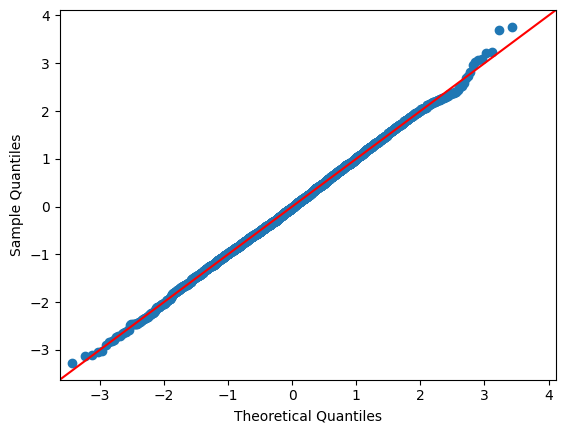

In [581]:
#Estimating parameters for GBM based on distribution:
normality = sc.stats.anderson(x=stock_return_ratios, dist="norm")
print(normality)


import statsmodels.api as sm
fig = sm.qqplot(data=np.array(stock_return_ratios), fit=True, line="45" )
plt.show()

In [582]:
delta_t = total_time/num_timesteps
true_stat_params = [(drift_coef-1/2*volatility**2)*delta_t, volatility*np.sqrt(delta_t)]
measured_stat_params = [np.mean(stock_return_ratios), np.std(stock_return_ratios)]

#print(true_stat_params)
#print(measured_stat_params)

estimated_volatility = np.std(stock_return_ratios)/np.sqrt(delta_t)
estimated_drift_coef = np.mean(stock_return_ratios)/delta_t + 1/2*estimated_volatility**2

print('\n')
print("True drift coefficient:", drift_coef,"\n","Estimated drift coefficient:", estimated_drift_coef)
print("True volatility:", volatility,'\n',"Estimated volatility:", estimated_volatility)




True drift coefficient: 3.968253968253968e-06 
 Estimated drift coefficient: 3.524845559965277e-05
True volatility: 0.002 
 Estimated volatility: 0.0020006239210213434


In [583]:
### MLE stuff:  https://stats.stackexchange.com/questions/605530/estimate-parameters-in-brownian-motion-with-drift-dx-t-mu-dt-sigma-dw-t
###             https://www.diva-portal.org/smash/get/diva2:1218088/FULLTEXT01.pdf

def gbm_log_likelihood(array, mu_est, sigma_est, deltat):
    part1 = -len(array)*np.log(sigma_est)
    part2 = 0
    for index, item in enumerate(array):
        if index >= 1:
            part2 += np.log(2*np.pi*deltat)
    part3 = 0
    for index, item in enumerate(array):
        if index >= 1:
            part3 += (array[index] - array[index-1] - mu_est*delta_t)**2
    return part1 - 1/2*part2 - 1/(2*sigma_est**2)*part3

print(gbm_log_likelihood(test_array, 7.376864175188356e-05, 0.0010119910633274345, delta_t))



-4825062.1233939575


In [584]:
import yfinance as yf
import matplotlib.ticker as tkr
from datetime import datetime

stock = 'SPY'
spy = yf.Ticker(stock)

spy_prices = spy.history(period = '60d', interval='1h')['Close']


c:\Users\Mustafa\AppData\Local\Programs\Python\Python311\Lib\site-packages\yfinance\utils.py:633: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if not _np.isnan(quotes["High"][n - 1]):
c:\Users\Mustafa\AppData\Local\Programs\Python\Python311\Lib\site-packages\yfinance\utils.py:634: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  quotes.loc[idx2, "High"] = _np.nanmax([quotes["High"][n - 1], quotes["High"][n - 2]])
c:\Users\Mustafa\AppData\Local\Programs\Python\Python311\Lib\site-packages\yfinance\utils.py:638: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys w

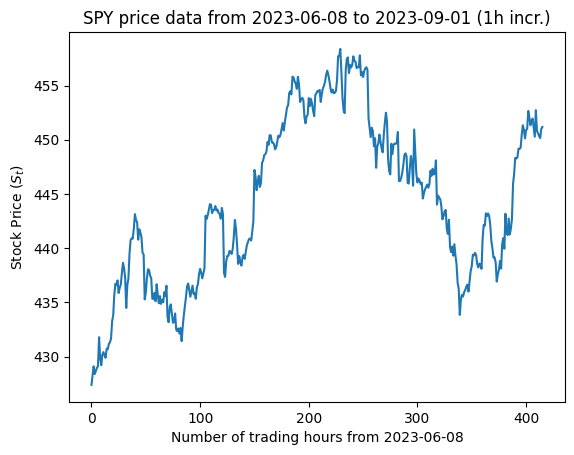

In [587]:
def plot_real_prices(input_stock_data, granularity):
    fig, ax = plt.subplots()
    ax.plot(range(len(input_stock_data.index)), input_stock_data.values.tolist())
    ticklabels = input_stock_data.index.strftime('%Y-%m-%d')

    plt.title("SPY price data from {} to {} ({} incr.)".format(ticklabels[0], ticklabels[len(ticklabels)-1], granularity))
    plt.xlabel("Number of trading hours from {}".format(ticklabels[0]))
    plt.ylabel("Stock Price $(S_t)$")
    plt.show()

plot_real_prices(spy_prices, '1h')

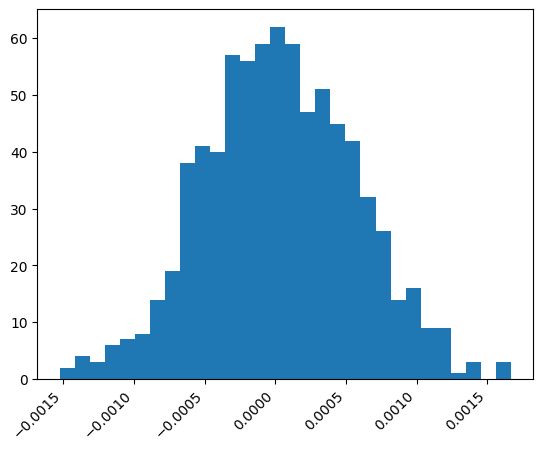

AndersonResult(statistic=0.4596413692282795, critical_values=array([0.571, 0.65 , 0.78 , 0.909, 1.082]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=2.8224795945595796e-05, scale=0.0005329374699388605)
 success: True
 message: '`anderson` successfully fit the distribution to the data.')


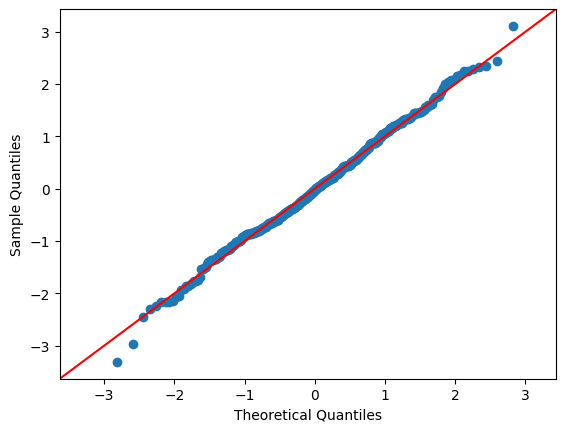

In [588]:
spy_return_ratios = get_stock_return_ratios(spy_prices.values.tolist())

plt.hist(spy_ratios, bins = 30)
plt.xticks(rotation=45, ha='right')
plt.show()

normality = sc.stats.anderson(x=spy_return_ratios, dist="norm")
print(normality)


import statsmodels.api as sm
fig = sm.qqplot(data=np.array(spy_return_ratios), fit=True, line="45" )
plt.show()

In [ ]:
spy_estimated_volatility = np.std(spy_return_ratios)/np.sqrt(delta_t)
spy_estimated_drift_coef = np.mean(spy_return_ratios)/delta_t + 1/2*spy_estimated_volatility**2